# $\S 2$ Interpolation Methods 
---

In this lab, I will test three algorithms of solving no-linear equation about their correctness and efficiency, they are('*' is alternative to do): 
- Lagrange interpolation
- Newtonian interpolation
- cubic spline interpolation     
- Aitken interpolation*   
And then use them to solve two problems in instruction book.

## 1. realization of these algorithms 

In [23]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.interpolate as std

In [24]:
def vis(polat, f, x, lim=1):
    lim = 1.5

    xx = np.linspace(x[0] - lim, x[-1] + lim, abs(x[-1] - x[0]) * 100)
    y = f(xx)
    p = polat(f, x)
    yy = p(xx)
    plt.plot(xx,  y, label='original')
    plt.plot(xx, yy + 0.1, label='interpolation')
    plt.scatter(x, f(x), marker='o', color='r', label='interpolation points')
    plt.legend()
    plt.show()

### 1.1. Lagrange Interpolation 

Formualr of Interpolation:   
given that $n+1$ points $(x_i, y_i),\ i\in\{0, 1, 2, ..., n\}$ on function $f(x)$. They follow the order: $x_0<x_1<x_2<...<x_n$. we can interplate it by following function with $n^{th}$ largrange method: 
$$
p_n(x) = \sum_{i=0}^{n} y_i\cdot l_i(x) \\ 
\Rightarrow \sum_{i=0}^{n} y_i \cdot \prod_{j=0, j \ne i}^{n} {x - x_j \over x_i - x_j} \tag{1}
$$

In [25]:
def lagrange(f, x):
    n = len(x) - 1
    y = f(x)

    def ll(k, t):
        f = 1
        for j in range(n): # calcualte l_i
            if j != k:
                f *= (t - x[j]) / (x[k] - x[j]) 

        return f
            
    def larg(t):
        p = 0
        for i in range(n):
            p += ll(i, t) * y[i]

        return p
    
    return larg

### 1.2. Newtonian Interpolation 

Formualr of Interpolation:   
given that $n+1$ points $(x_i, y_i),\ i\in\{0, 1, 2, ..., n\}$ on function $f(x)$. They follow the order: $x_0<x_1<x_2<...<x_n$. we can interplate it by following function with $n^{th}$ Newtonian method: 
$$
p_n(x) = f(x_0) + \sum_{i=1}^{n} f[x_0, x_1,..., x_k] \cdot \omega_k(x) \tag{2}
$$
where $f[x_0, x_1, ..., x_k]$ is $k^{th}$ difference of $f(x)$ on interpolation points. 
it can be defined as: 
$$
f[x_1, ..., x_k] = {f[x_1, ..., x_{k-1}] - f[x_2, ..., x_k] \over x_1 - x_k} , \ f[x_i] = f(x_i), i=0, 1, ..., n \tag{3}
$$
to make its calculation more easy, we use a table to assist our computation. (suppose that $n = 4$)
<center> 

|$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ x\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $|$\ \ \ \ \ \ \ \ \ \ \ \ \ \ f(x)\ \ \ \ \ \ \ \ \ \ \ \ \ \ $|$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $|$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $ | $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $|
|:---:|:---:|:---:|:---:|:---:|
|$x_0$|$f(x_0)$|||
|$x_1$|$f(x_1)$|$f[x_0, x_1]$| |
|$x_2$|$f(x_2)$|$f[x_1, x_2]$|$f[x_0, x_1, x_2]$| |
|$x_3$|$f(x_3)$|$f[x_2, x_3]$|$f[x_1, x_2, x_3]$|$f[x_0, x_1, x_2, x_3]$|
</center>
<center>

**Table 1.** difference table of origin function $f$ on interpolation points $x_0, ..., x_n$
</center>

The final result is the diagonal of this table. And to decrease spatial complexity, we use an arr to replace this table, and a special update method is applied here: we update this table from bottom. 

In [26]:
def newton(f, x): 
    n = len(x) - 1
    arr = [f(t) for t in x]                                                                                            
    for i in range(n):  # t: O(n^2), s: O(n)
        for j in range(n, i, -1):  # up date arr, calcualte diff table
            arr[j] = (arr[j] - arr[j - 1]) / (x[j] - x[j - 1 - i])

    def newtonf(var): # calculate interpolation function 
        p = 0
        w = 1
        for i in range(n + 1):
            p += arr[i] * w
            w *= var - x[i]

        return p
    return newtonf

### 1.3. Cubic spline interpolation 

In [30]:
def cubspolat(f, x):
    pass

### 1.4. Aitken Interpolation*

In [29]:
def aitken(f, x):
    pass

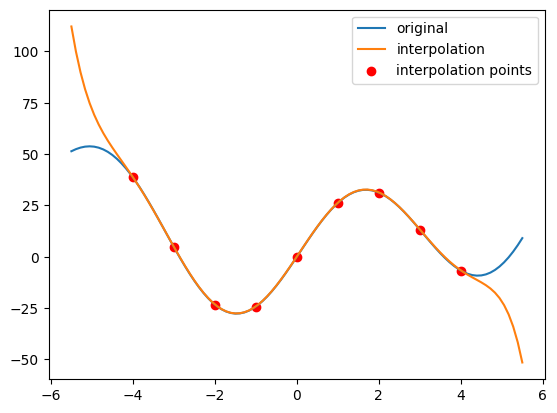

In [27]:
x = np.arange(-4, 5)
f = lambda x: x**2 + 30*np.sin(x)
vis(newton, f, x, 1)

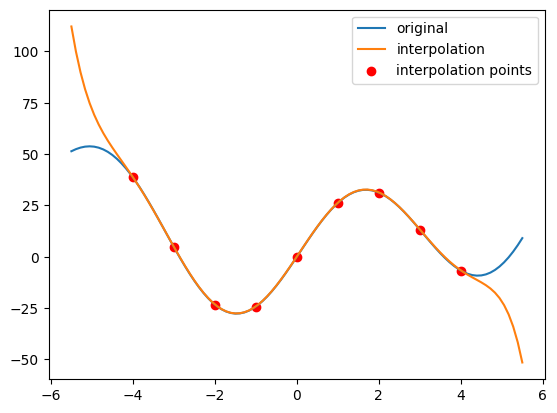

In [28]:
x = np.arange(-4, 5)
f = lambda x: x**2 + 30*np.sin(x)
vis(lagrange, f, x, 1)